In [20]:
# Data processing packages
import numpy as np
import pandas as pd
from collections import Counter

# Machine learning packages
from sklearn.model_selection import GridSearchCV, RepeatedKFold, cross_val_score, KFold, train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, MultiLabelBinarizer, FunctionTransformer
from sklearn.pipeline import Pipeline
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.feature_selection import SequentialFeatureSelector, RFE, SelectPercentile, chi2, mutual_info_regression, SelectFromModel
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA, KernelPCA, FastICA
from sklearn.manifold import TSNE
from sklearn.metrics import mean_squared_error

import torch
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras import optimizers
from keras.layers import BatchNormalization

# Visualization packages
import seaborn as sns
import matplotlib.pyplot as plt

# Others
import time
from pathlib import Path

## 5 Models

In [4]:
X1_pca = torch.load('X1_pca').to_numpy()
X1_ica = torch.load('X1_ica').to_numpy()
X1_tsne = torch.load('X1_tsne').to_numpy()
Y1 = pd.read_csv("Y1.csv", header=None, names=['revenue ']).to_numpy().ravel()
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X1_pca, Y1, random_state=42, test_size=0.1)
X_train_ica, X_test_ica, _, _ = train_test_split(X1_ica, Y1, random_state=42, test_size=0.1)
X_train_tsne, X_test_tsne, _, _ = train_test_split(X1_tsne, Y1, random_state=42, test_size=0.1)

### 5.2 KNN

In [8]:
knn = KNeighborsRegressor()
knn_k_range = list(range(1, 41))
knn_param_grid = {
    'n_neighbors': knn_k_range
}

In [9]:
knn_grid_pca = GridSearchCV(knn, knn_param_grid, cv=10, scoring='neg_root_mean_squared_error', return_train_score=True,verbose=2)
knn_grid_ica = GridSearchCV(knn, knn_param_grid, cv=10, scoring='neg_root_mean_squared_error', return_train_score=True,verbose=2)
knn_grid_tsne = GridSearchCV(knn, knn_param_grid, cv=10, scoring='neg_root_mean_squared_error', return_train_score=True,verbose=2)

In [10]:
knn_grid_pca.fit(X_train_pca, np.log(1 + y_train))

Fitting 10 folds for each of 40 candidates, totalling 400 fits
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END .....................................

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=2)

In [26]:
torch.save(knn_grid_pca, "../models/knn_grid_pca")

In [12]:
print("The best parameter K is:", knn_grid_pca.best_params_)
print("The best RMSE is:", knn_grid_pca.best_score_)

The best parameter K is: {'n_neighbors': 22}
The best RMSE is: -2.9175044373092835


In [13]:
knn_grid_ica.fit(X_train_ica, np.log(1 + y_train))

Fitting 10 folds for each of 40 candidates, totalling 400 fits
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END .....................................

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=2)

In [25]:
torch.save(knn_grid_ica, "../models/knn_grid_ica")

In [18]:
print("The best parameter K is:", knn_grid_ica.best_params_)
print("The best RMSE is:", knn_grid_ica.best_score_)

The best parameter K is: {'n_neighbors': 13}
The best RMSE is: -2.5662457263191483


In [16]:
knn_grid_tsne.fit(X_train_tsne, np.log(1 + y_train))

Fitting 10 folds for each of 40 candidates, totalling 400 fits
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END .....................................

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=2)

In [24]:
torch.save(knn_grid_tsne, "../models/knn_grid_tsne")

In [19]:
print("The best parameter K is:", knn_grid_tsne.best_params_)
print("The best RMSE is:", knn_grid_tsne.best_score_)

The best parameter K is: {'n_neighbors': 12}
The best RMSE is: -3.24501342188343


In [39]:
def plot_rmse_line(grid_search_list, label_list, fig_name):

    plt.figure(figsize=(10, 6))

    for i in range(len(grid_search_list)):
        grid_search = grid_search_list[i]
        cv_result = grid_search.cv_results_
        mean_test_score = np.abs(cv_result['mean_test_score'])
        min_x = np.argmin(mean_test_score) + 1
        min_y = np.min(mean_test_score)

        plt.plot(mean_test_score, label=label_list[i])
        if i == len(grid_search_list) - 1:
            plt.scatter(min_x, min_y, c='r', marker='x', label='minimum')
        else:
            plt.scatter(min_x, min_y, c='r', marker='x')

    plt.legend()
    plt.xlabel('K neighbours')
    plt.ylabel('RMSE')
    plt.savefig('../Figures/' + fig_name)
    plt.show()

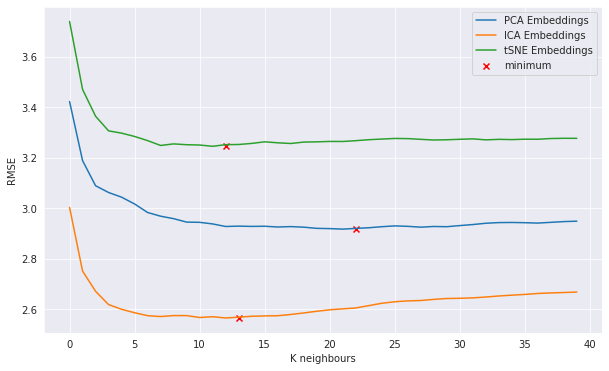

In [40]:
grid_search_list = [knn_grid_pca, knn_grid_ica, knn_grid_tsne]
label_list = ['PCA Embeddings', 'ICA Embeddings', 'tSNE Embeddings']
plot_rmse_line(grid_search_list, label_list, 'KNN_model_selection.pdf')